# **Lecture 3 : Polynominal and spline fitting examples**
>
>- **Polynominal regression**
>- **Spline regression**
>- **Goodness of fit**


## **Part I**: Polynominal regression
> 
>- NB: a polynominal regression can container multiple features (independent variables)
>- 1, we first start with a single feature Polynominal regression
>
>  $Y = a_1\times X^3 + a_2 \times X^2 + a_3 + ...$
>
>  $Y = a_1\times X_1^3 + a_2 \times X_2^2 + a_3 \times X_3 + a_4$
>- 2, we will neither go to multiple feature or left for your own excercises

### ***1.1, single feature polynominal regression***

In [8]:
# Load all the necessary python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# below are some of the machine learning related libraries from sklearn package
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

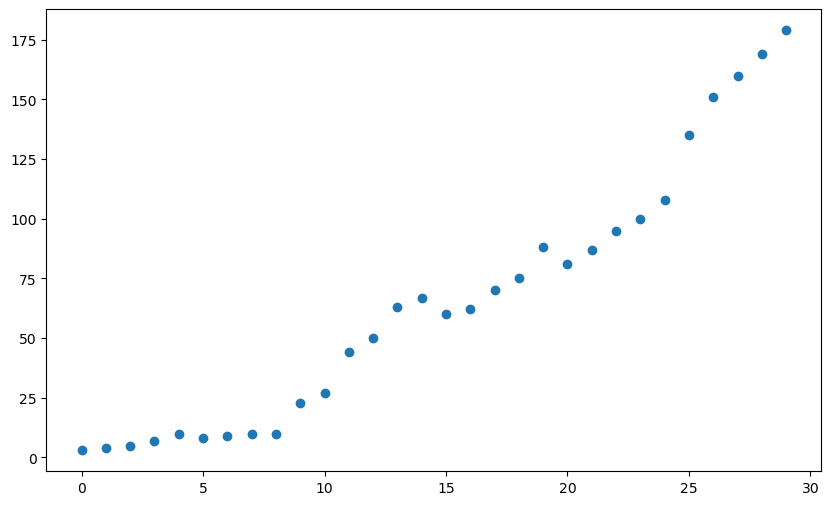

In [2]:
# generate the data/features and plot them
x = np.arange(0, 30)
y = [3, 4, 5, 7, 10, 8, 9, 10, 10, 23, 27, 44, 50, 63, 67, 60, 62, 70, 75, 88, 81, 87, 95, 100, 108, 135, 151, 160, 169, 179]
plt.figure(figsize=(10,6))
plt.scatter(x, y)
plt.show()


### For the ploynominal regression $Y = a_1 \times X^n + a_2 \times X^{n-1} + ...$. two questions related to the polynominal regression
>
>- How do we establish the degree of our polynomial $n$?
>- How do we create $x^2$, $x^3$ or $x^n$ when originally we have x as our one and only feature?
>- There are different ways to do that. You are free to find/research your own ways to the problems

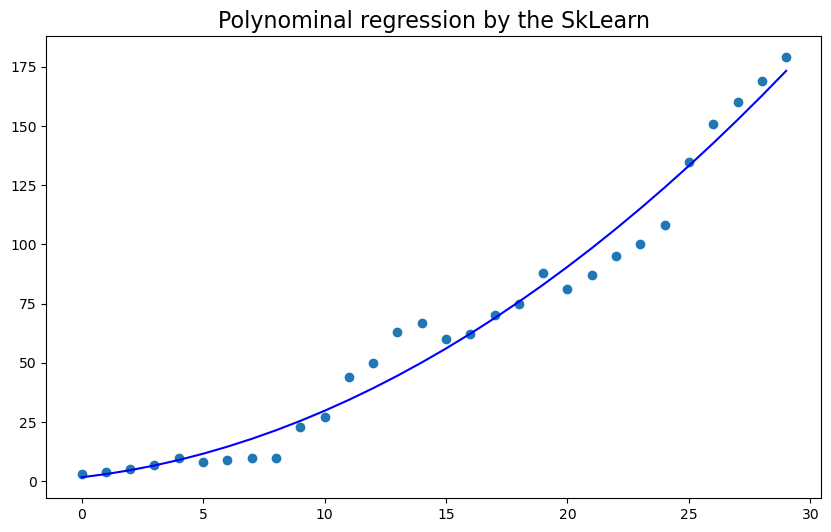

In [23]:
from sklearn.preprocessing import PolynomialFeatures

#STEP 1: Determining the degree of the polynomial
poly = PolynomialFeatures(degree=2, include_bias=False)

#STEP 2: Creating the new features
# poly_features = poly.fit_transform(x.reshape(-1, 1))
poly.fit(x.reshape(-1,1))
poly_features = poly.transform(x.reshape(-1,1))

#STEP 3: Creating the polynomial regression model
from sklearn.linear_model import LinearRegression  # NB: polynominal regression is still a linear regression
poly_reg_model = LinearRegression()
poly_reg_model.fit(poly_features, y)

#Step 4: use the established polymodel to predict
y_predicted = poly_reg_model.predict(poly_features) 

#STEP 5: prediction, plot and check the model prediction
plt.figure(figsize = (10,6))
plt.title("Polynominal regression by the SkLearn", size =16)
plt.scatter(x,y)
plt.plot(x,y_predicted, c="blue")
plt.show()

### ***1.2, multiple features polynominal regression***

In [25]:
# first, generate random data samples
np.random.seed(1)  # change the seed here will generate different data samples
x_1 = np.absolute(np.random.randn(100, 1) * 10)  # Feature 1: x_1
x_2 = np.absolute(np.random.randn(100, 1) * 30)  # Feature 2: x_2
y = 2*x_1**2 + 3*x_1 + 2 + np.random.randn(100, 1)*20

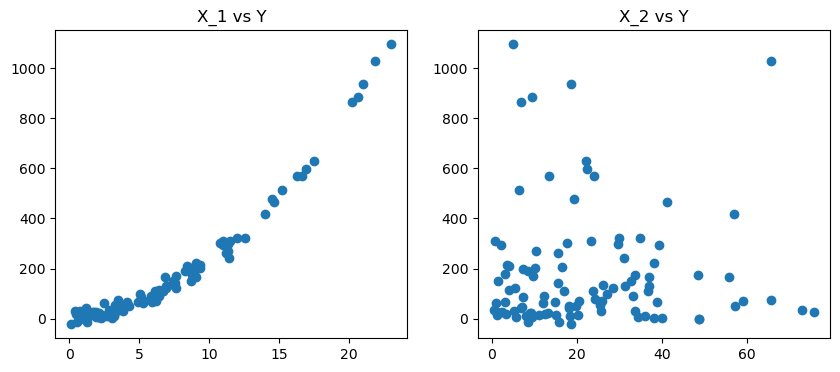

In [27]:
# second, we plot the two data features in terms of target y
fig, axes = plt.subplots(nrows =1, ncols =2, figsize = (10,4))
axes[0].scatter(x_1,y)
axes[1].scatter(x_2,y)
axes[0].set_title('X_1 vs Y')
axes[1].set_title('X_2 vs Y')
plt.show()

#### NB: in the following, we will use the pandas dataframe to handle the data structure

In [31]:
# STEP1: store the data in pd.dataframe
df = pd.DataFrame({"x_1": x_1.reshape(100,), "x_2": x_2.reshape(100,), "y": y.reshape(100,)}, index = range(0,100))
df

,x_1,x_2,y
0,16.243454,13.413857,570.412369
1,6.117564,36.735231,111.681987
2,5.281718,12.104749,62.392124
3,10.729686,17.807356,303.538953
4,8.654076,32.847355,151.109269
...,...,...,...
95,0.773401,48.823150,-0.430738
96,3.438537,18.069578,44.308720
97,0.435969,12.608466,19.383456
98,6.200008,24.328550,78.371729


The RMSE for the polynomial regression is 20.937708 with real y[0] = 570.412369.


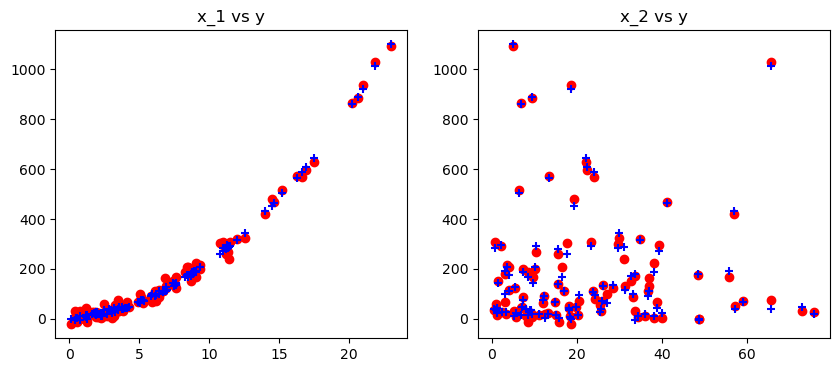

In [45]:
# STEP 2: define training and test dataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


X, y = df[["x_1", "x_2"]], df["y"]
poly = PolynomialFeatures(degree = 2, include_bias = False)
poly_features = poly.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size = 0.3, random_state = 42) # set random_state is for pseduo random see to repeatable


# STEP 3: createing the polynomial regression model
poly_reg_model = LinearRegression()
poly_reg_model.fit(X_train, y_train)

poly_reg_y_predicted = poly_reg_model.predict(X_test)
poly_reg_rmse = np.sqrt(mean_squared_error(y_test, poly_reg_y_predicted))
print("The RMSE for the polynomial regression is %f with real y[0] = %f."%(poly_reg_rmse,y_test[0]))


# STEP 4: plot the predicted results in terms of x_1 and x_2
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10,4))
ax[0].set_title("x_1 vs y")
ax[1].set_title("x_2 vs y")
ax[0].scatter(x_1, y, color='red'), ax[0].scatter(x_1, poly_reg_model.predict(poly_features),color='blue', marker = '+')
ax[1].scatter(x_2, y,color='red'), ax[1].scatter(x_2, poly_reg_model.predict(poly_features),color='blue', marker = '+')
plt.show()

In [47]:
## Below we can display the model parameters
poly_reg_model.coef_, poly_reg_rmse

(array([ 3.61945509, -1.0859955 ,  1.89905813,  0.0207338 ,  0.01300394]),
 20.937707839078673)

# **Part II: SPLINE regression/interpolation vs Polynominal regression**
>
>- Due to special properties of SPLINE (cubic) curve along knots, SPLINE is more known as interpolation
>- Too many constraints from SPLINE may be not good for extrapolation in comparison with other simple regressions
>- Below, we will demonstrate them

In [2]:
# first again, load all necessary libraries at once
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures, SplineTransformer
from sklearn.pipeline import make_pipeline

def f(x):
    """Function to be approximated by polynomial interpolation."""
    return x * np.sin(x)


# whole range we want to plot
x_plot = np.linspace(-1, 11, 100)

In [3]:
# a small subset of points to train on to see the difference: generate the train data samples
x_train = np.linspace(0, 10, 100)
rng = np.random.RandomState(0)
x_train = np.sort(rng.choice(x_train, size=20, replace=False))
y_train = f(x_train)

# create 2D-array versions of these arrays to feed to transformers
X_train = x_train[:, np.newaxis]
X_plot = x_plot[:, np.newaxis]

### ***Now we start to regression and plot the results***

In [34]:
LR = PolynomialFeatures(3)
mod = LinearRegression().fit(LR.fit_transform(X_train),y_train)
mod.coef_, len(x_train)

(array([ 0.        , -3.42735081,  0.85016801, -0.0532906 ]), 20)

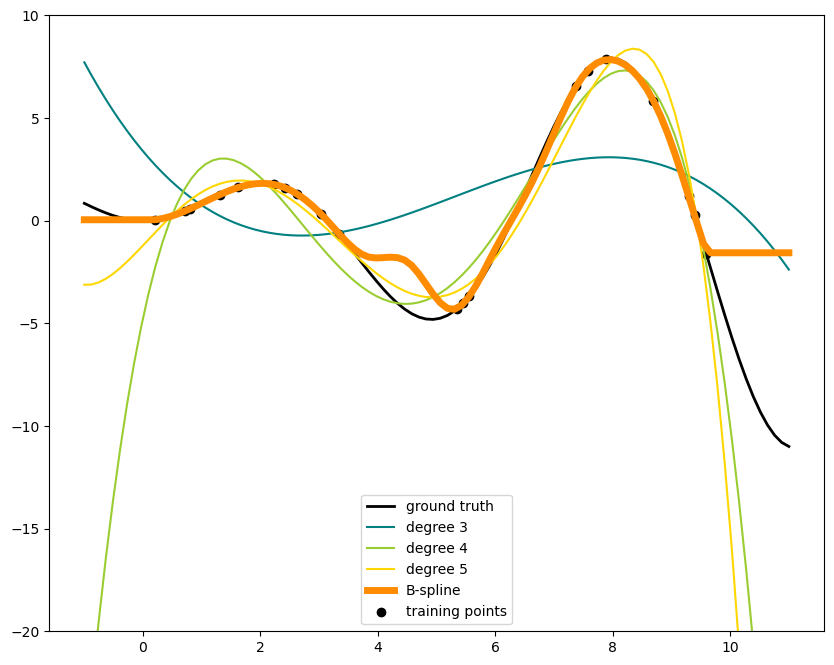

In [46]:
# plot function
lw = 2
fig, ax = plt.subplots(figsize = (10,8))
ax.set_prop_cycle(
    color=["black", "teal", "yellowgreen", "gold", "darkorange", "tomato"]
)
ax.plot(x_plot, f(x_plot), linewidth=lw, label="ground truth")

# plot training points
ax.scatter(x_train, y_train, label="training points")

# polynomial features
for degree in [3, 4, 5]:
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())# Ridge(alpha=1e-3)) # This pipeline assessemble: PolynominalFeatures + feature_fit + FeatureTransformation + LinearRegression/Ridge regression
    model.fit(X_train, y_train)
    y_plot = model.predict(X_plot)
    ax.plot(x_plot, y_plot, label=f"degree {degree}")

# B-spline with 4 + 3 - 1 = 6 basis functions
# choice of n_knots and degree will determins if Spline is used for regression/interpolation
model = make_pipeline(SplineTransformer(n_knots=14, degree=3), Ridge(alpha=1e-3))  # play with the change of knots and degree
model.fit(X_train, y_train)

y_plot = model.predict(X_plot)
ax.plot(x_plot, y_plot, linewidth=5, label="B-spline")
ax.legend(loc="lower center")
ax.set_ylim(-20, 10)
plt.show()

### 
This shows nicely that higher degree polynomials can fit the data better. But at the same time, too high powers can show unwanted oscillatory behaviour and are particularly dangerous for extrapolation beyond the range of fitted data. This is an advantage of B-splines. They usually fit the data as well as polynomials and show very nice and smooth behaviour. They have also good options to control the extrapolation, which defaults to continue with a constant. 

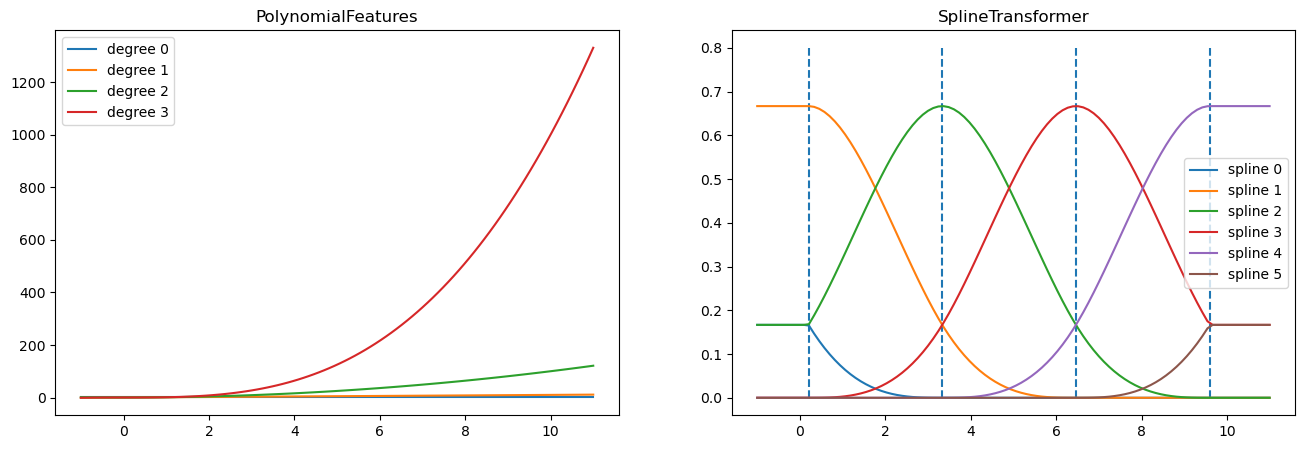

In [47]:
fig, axes = plt.subplots(ncols=2, figsize=(16, 5))
pft = PolynomialFeatures(degree=3).fit(X_train)
axes[0].plot(x_plot, pft.transform(X_plot))
axes[0].legend(axes[0].lines, [f"degree {n}" for n in range(4)])
axes[0].set_title("PolynomialFeatures")

splt = SplineTransformer(n_knots=4, degree=3).fit(X_train)
axes[1].plot(x_plot, splt.transform(X_plot))
axes[1].legend(axes[1].lines, [f"spline {n}" for n in range(6)])
axes[1].set_title("SplineTransformer")

# plot knots of spline
knots = splt.bsplines_[0].t
axes[1].vlines(knots[3:-3], ymin=0, ymax=0.8, linestyles="dashed")
plt.show()

### ***Finally, we are looking at another different Splines, i.e., Period Splines***

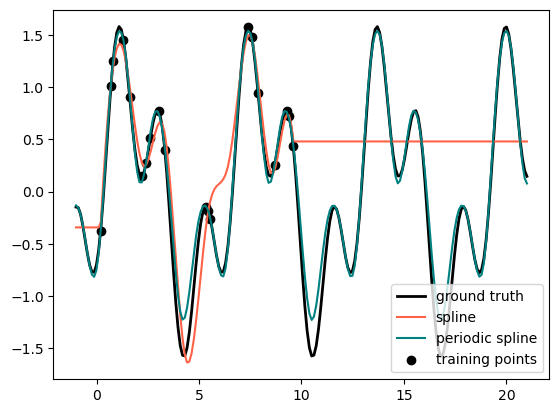

In [49]:
def g(x):
    """Function to be approximated by periodic spline interpolation."""
    return np.sin(x) - 0.7 * np.cos(x * 3)


y_train = g(x_train)

# Extend the test data into the future:
x_plot_ext = np.linspace(-1, 21, 200)
X_plot_ext = x_plot_ext[:, np.newaxis]

lw = 2
fig, ax = plt.subplots()
ax.set_prop_cycle(color=["black", "tomato", "teal"])
ax.plot(x_plot_ext, g(x_plot_ext), linewidth=lw, label="ground truth")
ax.scatter(x_train, y_train, label="training points")

for transformer, label in [
    (SplineTransformer(degree=3, n_knots=10), "spline"),
    (
        SplineTransformer(
            degree=3,
            knots=np.linspace(0, 2 * np.pi, 10)[:, None],
            extrapolation="periodic",
        ),
        "periodic spline",
    ),
]:
    model = make_pipeline(transformer, Ridge(alpha=1e-3))
    model.fit(X_train, y_train)
    y_plot_ext = model.predict(X_plot_ext)
    ax.plot(x_plot_ext, y_plot_ext, label=label)

ax.legend()
plt.show()

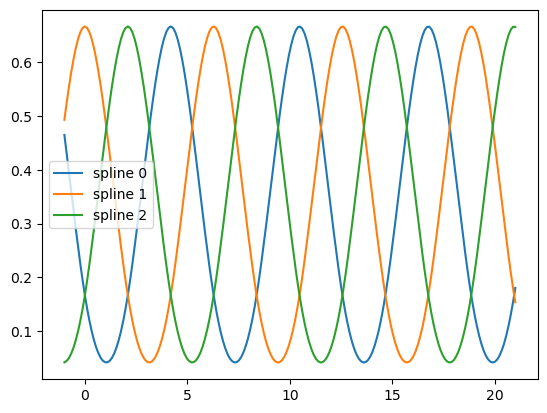

In [50]:
fig, ax = plt.subplots()
knots = np.linspace(0, 2 * np.pi, 4)
splt = SplineTransformer(knots=knots[:, None], degree=3, extrapolation="periodic").fit(
    X_train
)
ax.plot(x_plot_ext, splt.transform(X_plot_ext))
ax.legend(ax.lines, [f"spline {n}" for n in range(3)])
plt.show()